In [26]:
import csv

# Specify the path to your CSV file
csv_file_path = 'Drug_Poisoning_deaths_and_rates.csv'

data_list = []

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)


    # Iterate through the rows and append each row to the data_list
    for row in csv_reader:
        data_list.append(row)

In [27]:
data_list[0]

['Year',
 'Gender',
 'Intent',
 'Drug type',
 '< 1 year',
 '1-4 years',
 '5-14 years',
 '15-24 years',
 '25-34 years',
 '35-44 years',
 '45-54 years',
 '55-64 years',
 '65-74 years',
 '75-84 years',
 '85+ years',
 'Not stated',
 'All ages']

In [28]:
data_list[1]

['2021',
 'Both sexes',
 'All (preventable, intentional, undetermined)',
 'All drugs',
 '75',
 '126',
 '7426',
 '24070',
 '26908',
 '21875',
 '108',
 '19399',
 '5646',
 '800',
 '256',
 '10',
 '106699']

In [84]:
# Find the indices of 'Gender' and 'Intent' columns
gender_index = data_list[0].index('Gender')
intent_index = data_list[0].index('Intent')
drug_index = data_list[0].index('Drug type')

# Filter the data for drug poison deaths
drug_poison_data = [row for row in data_list[1:] if row[gender_index] != 'Both sexes' and row[drug_index] != 'All drugs' and row[drug_index] != 'Opioid subgroup - heroin' and row[drug_index] != 'Opioid subgroup - methadone' and row[drug_index] != 'Opioid subgroup – including fentanyl' and row[drug_index] != 'Opioid subgroup – including oxycodone and hydrocodone'] 

In [85]:
drug_poison_data[:20]

[['2021',
  'Female',
  'All (preventable, intentional, undetermined)',
  'Any Opioid',
  '25',
  '50',
  '1866',
  '5539',
  '6046',
  '4757',
  '33',
  '4155',
  '1008',
  '123',
  '51',
  '1',
  '23654'],
 ['2021',
  'Female',
  'All (preventable, intentional, undetermined)',
  'Benzodiazepines',
  '0',
  '0',
  '329',
  '1012',
  '1241',
  '1097',
  '0',
  '986',
  '299',
  '57',
  '29',
  '6',
  '5056'],
 ['2021',
  'Female',
  'All (preventable, intentional, undetermined)',
  'Cannabis',
  '0',
  '0',
  '41',
  '77',
  '78',
  '65',
  '0',
  '41',
  '5',
  '0',
  '0',
  '0',
  '307'],
 ['2021',
  'Female',
  'All (preventable, intentional, undetermined)',
  'Cocaine',
  '0',
  '0',
  '384',
  '1402',
  '1784',
  '1614',
  '0',
  '1423',
  '229',
  '14',
  '0',
  '8',
  '6858'],
 ['2021',
  'Female',
  'All (preventable, intentional, undetermined)',
  'Psychostimulants – incl. methamphetamine',
  '10',
  '0',
  '541',
  '2119',
  '2700',
  '2072',
  '0',
  '1499',
  '252',
  '15',

In [86]:
# Count the occurrences of each gender in drug poison deaths
all_drug_counts_F = {'Any Opioid': 0, 'Benzodiazepines': 0, 'Cannabis':0,  'Cocaine':0,  'Psychostimulants – incl. methamphetamine':0}
all_drug_counts_M = {'Any Opioid': 0, 'Benzodiazepines': 0, 'Cannabis':0,  'Cocaine':0,  'Psychostimulants – incl. methamphetamine':0}

for row in drug_poison_data:
    drug = row[drug_index]
    gender = row[gender_index]
    if drug == 'Any Opioid':
        if gender == 'Male':
            all_drug_counts_M['Any Opioid'] += int(row[-1]) # all ages 
        else:
            all_drug_counts_F['Any Opioid'] += int(row[-1]) # all ages 
    if drug == 'Benzodiazepines':
        if gender == 'Male':
            all_drug_counts_M['Benzodiazepines'] += int(row[-1])
        else:
            all_drug_counts_F['Benzodiazepines'] += int(row[-1])
    if drug == 'Cannabis':
        if gender == 'Male':
            all_drug_counts_M['Cannabis'] += int(row[-1])
        else:
            all_drug_counts_F['Cannabis'] += int(row[-1])
    if drug == 'Cocaine':
        if gender == 'Male':
            all_drug_counts_M['Cocaine'] += int(row[-1])
        else:
            all_drug_counts_F['Cocaine'] += int(row[-1])
    else:
        if gender == 'Male':
            all_drug_counts_M['Psychostimulants – incl. methamphetamine'] += int(row[-1])
        else:
            all_drug_counts_F['Psychostimulants – incl. methamphetamine'] += int(row[-1])

In [87]:
# Calculate the amount of different genders:
female_data = list(all_drug_counts_F.values())
male_data = list(all_drug_counts_M.values())
print(female_data, male_data)

[383214, 104660, 3561, 96121, 567980] [826062, 158113, 10761, 261355, 1183083]


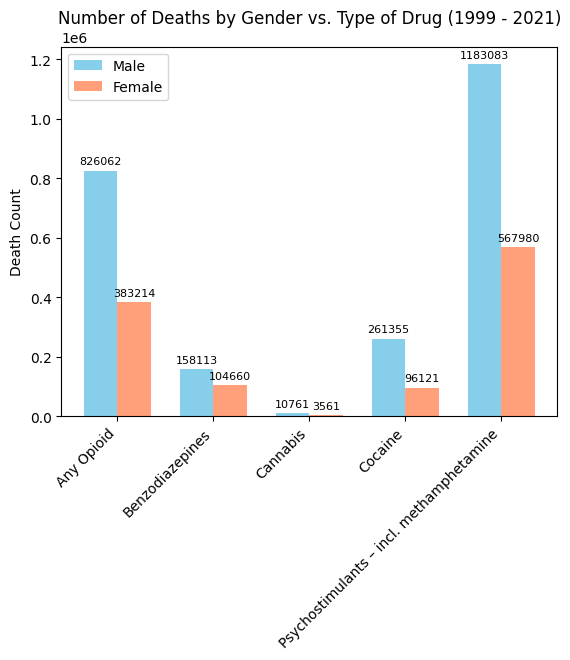

In [90]:
import matplotlib.pyplot as plt
import numpy as np
# graph 1
drugs = ['Any Opioid', 'Benzodiazepines', 'Cannabis', 'Cocaine', 'Psychostimulants – incl. methamphetamine']
x = np.arange(len(drugs))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_data, width, label='Male', color='skyblue')
rects2 = ax.bar(x + width/2, female_data, width, label='Female', color='lightsalmon')

ax.set_ylabel('Death Count')
ax.set_title('Number of Deaths by Gender vs. Type of Drug (1999 - 2021)')
ax.set_xticks(x)
ax.set_xticklabels(drugs, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1)
autolabel(rects2)

plt.savefig('Number of Deaths by Gender vs. Type of Drug (1999 - 2021).png', dpi=500)  

plt.show()

In [72]:
# Filter the data for drug poison deaths
drug_poison_data = [row for row in data_list[1:] if row[gender_index] != 'Both sexes' and row[drug_index] != 'All drugs' and row[drug_index] != 'Any Opioid' and row[drug_index] != 'Benzodiazepines' and row[drug_index] != 'Cannabis'and row[drug_index] != 'Cocaine' and row[drug_index] != 'Psychostimulants – incl. methamphetamine'] 

In [73]:
drug_poison_data[:20]

[['2021',
  'Female',
  'All (preventable, intentional, undetermined)',
  'Opioid subgroup - heroin',
  '0',
  '0',
  '126',
  '552',
  '615',
  '510',
  '0',
  '465',
  '94',
  '5',
  '0',
  '5',
  '2372'],
 ['2021',
  'Female',
  'All (preventable, intentional, undetermined)',
  'Opioid subgroup - methadone',
  '0',
  '0',
  '28',
  '262',
  '392',
  '354',
  '0',
  '390',
  '85',
  '2',
  '0',
  '6',
  '1519'],
 ['2021',
  'Female',
  'All (preventable, intentional, undetermined)',
  'Opioid subgroup – including fentanyl',
  '24',
  '42',
  '1755',
  '5021',
  '5186',
  '3804',
  '29',
  '3056',
  '583',
  '55',
  '15',
  '1',
  '19571'],
 ['2021',
  'Female',
  'All (preventable, intentional, undetermined)',
  'Opioid subgroup – including oxycodone and hydrocodone',
  '0',
  '0',
  '182',
  '811',
  '1222',
  '1236',
  '0',
  '1309',
  '457',
  '81',
  '39',
  '13',
  '5350'],
 ['2021',
  'Female',
  'Preventable/accidental',
  'Opioid subgroup - heroin',
  '0',
  '0',
  '123',
  '

In [74]:
# Count the occurrences of each gender in drug poison deaths
all_drug_counts_F = {'Opioid subgroup - heroin': 0, 'Opioid subgroup - methadone': 0, 'Opioid subgroup – including fentanyl':0,  'Opioid subgroup – including oxycodone and hydrocodone':0}
all_drug_counts_M = {'Opioid subgroup - heroin': 0, 'Opioid subgroup - methadone': 0, 'Opioid subgroup – including fentanyl':0,  'Opioid subgroup – including oxycodone and hydrocodone':0}

for row in drug_poison_data:
    drug = row[drug_index]
    gender = row[gender_index]
    if drug == 'Opioid subgroup - heroin':
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup - heroin'] += int(row[-1]) # all ages 
        else:
            all_drug_counts_F['Opioid subgroup - heroin'] += int(row[-1]) # all ages 
    if drug == 'Opioid subgroup - methadone':
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup - methadone'] += int(row[-1])
        else:
            all_drug_counts_F['Opioid subgroup - methadone'] += int(row[-1])
    if drug == 'Opioid subgroup – including fentanyl':
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup – including fentanyl'] += int(row[-1])
        else:
            all_drug_counts_F['Opioid subgroup – including fentanyl'] += int(row[-1])
    else:
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup – including oxycodone and hydrocodone'] += int(row[-1])
        else:
            all_drug_counts_F['Opioid subgroup – including oxycodone and hydrocodone'] += int(row[-1])
    

In [75]:
# Calculate the amount of different genders:
female_data = list(all_drug_counts_F.values())
male_data = list(all_drug_counts_M.values())
print(female_data, male_data)

[67283, 55339, 162398, 276301] [228667, 94324, 389088, 558310]


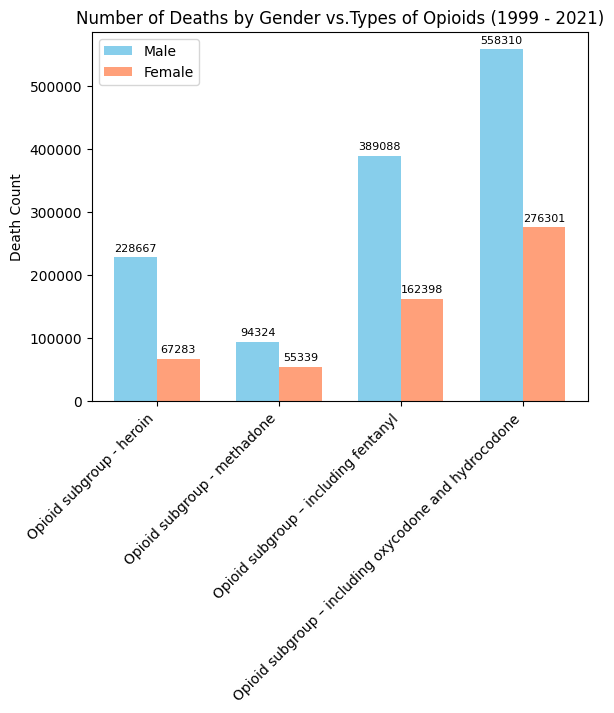

In [78]:
import matplotlib.pyplot as plt
import numpy as np
# graph 1
drugs = ['Opioid subgroup - heroin', 'Opioid subgroup - methadone', 'Opioid subgroup – including fentanyl', 'Opioid subgroup – including oxycodone and hydrocodone']
x = np.arange(len(drugs))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_data, width, label='Male', color='skyblue')
rects2 = ax.bar(x + width/2, female_data, width, label='Female', color='lightsalmon')

ax.set_ylabel('Death Count')
ax.set_title('Number of Deaths by Gender vs.Types of Opioids (1999 - 2021)')
ax.set_xticks(x)
ax.set_xticklabels(drugs, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1)
autolabel(rects2)

plt.show()